# Assignment #4 - Neural Networks

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

<font color="blue"> Madiha Tabassum</font>

# I. Overview

The objective of the assignment is to clearly learn the concept of and implement neural network, no-linear logistic regression and cross validation. In the assignment I first implemented the non-linear logistic regression using nural network. I compared this classification modle with pocket algorithm. I calculated accuracy score, precesion and f1 score to compare the classification models. I have also visualize the result and run the models through 5 fold cross validation that I implemeted.

# II. Data

# Introduction of Data

The data is from census database containing demographic and work information of adults. The dataset has 48842 samples and multivariate. The dataset has 14 feature/attribute values and attributes are integers and categorical. The features are used to predict whether a person makes over 50K a year. The features are[2]:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Final sampling weight[3], continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,   10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# Reading Data


In [2]:
#Reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dfc = pd.read_csv("adult.data.csv")
dfc

age          workclass  fnlwgt      education  education-num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
6       49            Private  160187            9th              5   
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
12      23            Private  122272      Bachelors             13   
13      32            Private  205019     Assoc-acdm             12   
14      40            Private  121772      Assoc-voc             11   
15      34            Private  245487        7th-8th              4   
16      25   Self-emp-not-inc  176756        HS-grad              9   
17      32            Private  186824        HS-grad              9   
18      38            Private   28887           11th              7   
19      43   Self-emp-not-inc  292175        Masters             14   
20      40            Private  193524      Doctorate             16   
21      54            Private  302146        HS-grad              9   
22      35        Federal-gov   76845            9th              5   
23      43            Private  117037           11th              7   
24      59            Private  109015        HS-grad              9   
25      56          Local-gov  216851      Bachelors             13   
26      19            Private  168294        HS-grad              9   
27      54                  ?  180211   Some-college             10   
28      39            Private  367260        HS-grad              9   
29      49            Private  193366        HS-grad              9   
...    ...                ...     ...            ...            ...   
32531   30                  ?   33811      Bachelors             13   
32532   34            Private  204461      Doctorate             16   
32533   54            Private  337992      Bachelors             13   
32534   37            Private  179137   Some-college             10   
32535   22            Private  325033           12th              8   
32536   34            Private  160216      Bachelors             13   
32537   30            Private  345898        HS-grad              9   
32538   38            Private  139180      Bachelors             13   
32539   71                  ?  287372      Doctorate             16   
32540   45          State-gov  252208        HS-grad              9   
32541   41                  ?  202822        HS-grad              9   
32542   72                  ?  129912        HS-grad              9   
32543   45          Local-gov  119199     Assoc-acdm             12   
32544   31            Private  199655        Masters             14   
32545   39          Local-gov  111499     Assoc-acdm             12   
32546   37            Private  198216     Assoc-acdm             12   
32547   43            Private  260761        HS-grad              9   
32548   65   Self-emp-not-inc   99359    Prof-school             15   
32549   43          State-gov  255835   Some-college             10   
32550   43   Self-emp-not-inc   27242   Some-college             10   
32551   32            Private   34066           10th              6   
32552   43            Private   84661      Assoc-voc             11   
32553   32            Private  116138        Masters             14   
32554   53            Private  321865        Masters             14   
32555   22            Private  

# Preprocessing of the Data


I have converted categorial values with numerical alternatives for clear visualization. As most of the values in this dataset are categorical, I did not normalize the attributes for visualization. However I normalized the values before running the analysis. We also checked if the data set contains any null value. It does not contain any null values. For the missing values I have added a default value of 'private' for workclass, 'tech support' for occupation and 'united states' for country.

In [3]:
del dfc['education']
dfc

age          workclass  fnlwgt  education-num          marital-status  \
0       39          State-gov   77516             13           Never-married   
1       50   Self-emp-not-inc   83311             13      Married-civ-spouse   
2       38            Private  215646              9                Divorced   
3       53            Private  234721              7      Married-civ-spouse   
4       28            Private  338409             13      Married-civ-spouse   
5       37            Private  284582             14      Married-civ-spouse   
6       49            Private  160187              5   Married-spouse-absent   
7       52   Self-emp-not-inc  209642              9      Married-civ-spouse   
8       31            Private   45781             14           Never-married   
9       42            Private  159449             13      Married-civ-spouse   
10      37            Private  280464             10      Married-civ-spouse   
11      30          State-gov  141297             13      Married-civ-spouse   
12      23            Private  122272             13           Never-married   
13      32            Private  205019             12           Never-married   
14      40            Private  121772             11      Married-civ-spouse   
15      34            Private  245487              4      Married-civ-spouse   
16      25   Self-emp-not-inc  176756              9           Never-married   
17      32            Private  186824              9           Never-married   
18      38            Private   28887              7      Married-civ-spouse   
19      43   Self-emp-not-inc  292175             14                Divorced   
20      40            Private  193524             16      Married-civ-spouse   
21      54            Private  302146              9               Separated   
22      35        Federal-gov   76845              5      Married-civ-spouse   
23      43            Private  117037              7      Married-civ-spouse   
24      59            Private  109015              9                Divorced   
25      56          Local-gov  216851             13      Married-civ-spouse   
26      19            Private  168294              9           Never-married   
27      54                  ?  180211             10      Married-civ-spouse   
28      39            Private  367260              9                Divorced   
29      49            Private  193366              9      Married-civ-spouse   
...    ...                ...     ...            ...                     ...   
32531   30                  ?   33811             13           Never-married   
32532   34            Private  204461             16      Married-civ-spouse   
32533   54            Private  337992             13      Married-civ-spouse   
32534   37            Private  179137             10                Divorced   
32535   22            Private  325033              8           Never-married   
32536   34            Private  160216             13           Never-married   
32537   30            Private  345898              9           Never-married   
32538   38            Private  139180             13                Divorced   
32539   71                  ?  287372             16      Married-civ-spouse   
32540   45          State-gov  252208              9               Separated   
32541   41                  ?  202822              9               Separated   
32542   72                  ?  129912              9      Married-civ-spouse   
32543   45          Local-gov  119199             12                Divorced   
32544   31            Private  199655             14                Divorced   
32545   39          Local-gov  111499             12      Married-civ-spouse   
32546   37            Private  198216             12                Divorced   
32547   43            Private  260761              9      Married-civ-spouse   
32548   65   Self-emp-not-inc   99359             15           Never-married   
32549  

In [4]:
#checking if there are any null values
dfc.isnull()

age  workclass  fnlwgt  education-num  marital-status  occupation  \
0      False      False   False          False           False       False   
1      False      False   False          False           False       False   
2      False      False   False          False           False       False   
3      False      False   False          False           False       False   
4      False      False   False          False           False       False   
5      False      False   False          False           False       False   
6      False      False   False          False           False       False   
7      False      False   False          False           False       False   
8      False      False   False          False           False       False   
9      False      False   False          False           False       False   
10     False      False   False          False           False       False   
11     False      False   False          False           False       False   
12     False      False   False          False           False       False   
13     False      False   False          False           False       False   
14     False      False   False          False           False       False   
15     False      False   False          False           False       False   
16     False      False   False          False           False       False   
17     False      False   False          False           False       False   
18     False      False   False          False           False       False   
19     False      False   False          False           False       False   
20     False      False   False          False           False       False   
21     False      False   False          False           False       False   
22     False      False   False          False           False       False   
23     False      False   False          False           False       False   
24     False      False   False          False           False       False   
25     False      False   False          False           False       False   
26     False      False   False          False           False       False   
27     False      False   False          False           False       False   
28     False      False   False          False           False       False   
29     False      False   False          False           False       False   
...      ...        ...     ...            ...             ...         ...   
32531  False      False   False          False           False       False   
32532  False      False   False          False           False       False   
32533  False      False   False          False           False       False   
32534  False      False   False          False           False       False   
32535  False      False   False          False           False       False   
32536  False      False   False          False           False       False   
32537  False      False   False          False           False       False   
32538  False      False   False          False           False       False   
32539  False      False   False          False           False       False   
32540  False      False   False          False           False       False   
32541  False      False   False          False           False       False   
32542  False      False   False          False           False       False   
32543  False      False   False          False           False       False   
32544  False      False   False          False           False       False   
32545  False      False   False          False           False       False   
32546  False      False   False          False           False       False   
32547  False      False   False          False           False       False   
32548  False      False   False          False           False       False   
32549  False      False   False          False           False       False   
32550  False      False   False

In [5]:
np.any(dfc.isnull())

False

In [6]:
workclassi = {' ?': 1, ' Private': 1, ' Self-emp-not-inc':2, ' Self-emp-inc':3, ' Federal-gov':4, ' Local-gov':5, ' State-gov':6, 
            ' Without-pay': 7, ' Never-worked':8}
educationi = {' Bachelors': 1, ' Some-college':2, ' 11th':3, ' HS-grad':4, ' Prof-school':5, ' Assoc-acdm':6, ' Assoc-voc':7,
              ' 9th':8, ' 7th-8th':9, ' 12th':10, ' Masters':11, ' 1st-4th':12, ' 10th':13, ' Doctorate':14, ' 5th-6th':15,
              ' Preschool':16}
maritali= {' Married-civ-spouse': 1, ' Divorced':2, ' Never-married':3, ' Separated':4, ' Widowed':5, ' Married-spouse-absent':6, 
            ' Married-AF-spouse': 7}
occupationi={' ?': 1, ' Tech-support': 1, ' Craft-repair':2, ' Other-service':3, ' Sales':4, ' Exec-managerial':5, ' Prof-specialty':6, 
             ' Handlers-cleaners':7,' Machine-op-inspct':8, ' Adm-clerical':9, ' Farming-fishing':10, ' Transport-moving':11, 
             ' Priv-house-serv':12, ' Protective-serv':13, ' Armed-Forces':14}
relationshipi= {' Wife': 1, ' Own-child':2, ' Husband':3, ' Not-in-family':4, ' Other-relative':5, ' Unmarried':6}
racei={' White': 1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4, ' Black':5}
sexi={' Male':1, ' Female':2}
countryi={' ?': 1, ' United-States': 1, ' Cambodia':2, ' England':3, ' Puerto-Rico':4, ' Canada':5, ' Germany':6, ' Outlying-US(Guam-USVI-etc)':7,
          ' India':8, ' Japan':9, ' Greece':10, ' China':11, ' Cuba':12, ' Iran':13, ' Honduras':14,' Philippines': 15, ' Italy':16, 
          ' Poland':17, ' Jamaica':18, ' Vietnam':19, ' Mexico':20, ' Portugal':21,' Ireland':22, ' France':23, ' Dominican-Republic':24, 
          ' Laos':25, ' Ecuador':26, ' Taiwan':27, ' Haiti':28, ' Columbia':29, ' Hungary':30, ' Guatemala':31, ' Nicaragua':32, 
          ' Scotland':33, ' Thailand':34, ' Yugoslavia':35, ' El-Salvador':36, ' Trinadad&Tobago':37, ' Peru':38, ' Hong':39, 
          ' Holand-Netherlands':40,  ' South':41}

salaryi={' <=50K':0, ' >50K':1}

X = dfc.iloc[:, :].copy()
X['workclass'] = X['workclass'].apply(lambda x: workclassi[x])
#XC['education'] = XC['education'].apply(lambda x: educationi[x])
X['marital-status'] = X['marital-status'].apply(lambda x: maritali[x])
X['occupation'] = X['occupation'].apply(lambda x: occupationi[x])
X['relationship'] = X['relationship'].apply(lambda x: relationshipi[x])
X['race'] = X['race'].apply(lambda x: racei[x])
X['sex'] = X['sex'].apply(lambda x: sexi[x])
X['native-country'] = X['native-country'].apply(lambda x: countryi[x])
X['Salary'] = X['Salary'].apply(lambda x: salaryi[x])
X

age  workclass  fnlwgt  education-num  marital-status  occupation  \
0       39          6   77516             13               3           9   
1       50          2   83311             13               1           5   
2       38          1  215646              9               2           7   
3       53          1  234721              7               1           7   
4       28          1  338409             13               1           6   
5       37          1  284582             14               1           5   
6       49          1  160187              5               6           3   
7       52          2  209642              9               1           5   
8       31          1   45781             14               3           6   
9       42          1  159449             13               1           5   
10      37          1  280464             10               1           5   
11      30          6  141297             13               1           6   
12      23          1  122272             13               3           9   
13      32          1  205019             12               3           4   
14      40          1  121772             11               1           2   
15      34          1  245487              4               1          11   
16      25          2  176756              9               3          10   
17      32          1  186824              9               3           8   
18      38          1   28887              7               1           4   
19      43          2  292175             14               2           5   
20      40          1  193524             16               1           6   
21      54          1  302146              9               4           3   
22      35          4   76845              5               1          10   
23      43          1  117037              7               1          11   
24      59          1  109015              9               2           1   
25      56          5  216851             13               1           1   
26      19          1  168294              9               3           2   
27      54          1  180211             10               1           1   
28      39          1  367260              9               2           5   
29      49          1  193366              9               1           2   
...    ...        ...     ...            ...             ...         ...   
32531   30          1   33811             13               3           1   
32532   34          1  204461             16               1           6   
32533   54          1  337992             13               1           5   
32534   37          1  179137             10               2           9   
32535   22          1  325033              8               3          13   
32536   34          1  160216             13               3           5   
32537   30          1  345898              9               3           2   
32538   38          1  139180             13               2           6   
32539   71          1  287372             16               1           1   
32540   45          6  252208              9               4           9   
32541   41          1  202822              9               4           1   
32542   72          1  129912              9               1           1   
32543   45          5  119199             12               2           6   
32544   31          1  199655             14               2           3   
32545   39          5  111499             12               1           9   
32546   37          1  198216             12               2           1   
32547   43          1  260761              9               1           8   
32548   65          2   99359             15               3           6   
32549   43          6  255835             10               2           9   
32550   43          2   27242             10               1           2   
32551   32          1   34066              6           

# Visualization of the Data


I have created normal graph plots, histogram and scatter plot to visualize the data. 


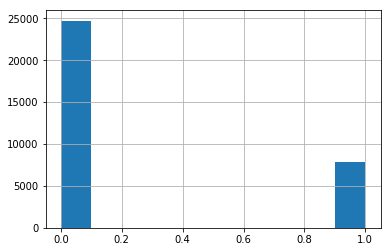

In [7]:
T=X['Salary']
XC=X.iloc[:,:-1]
T.hist()

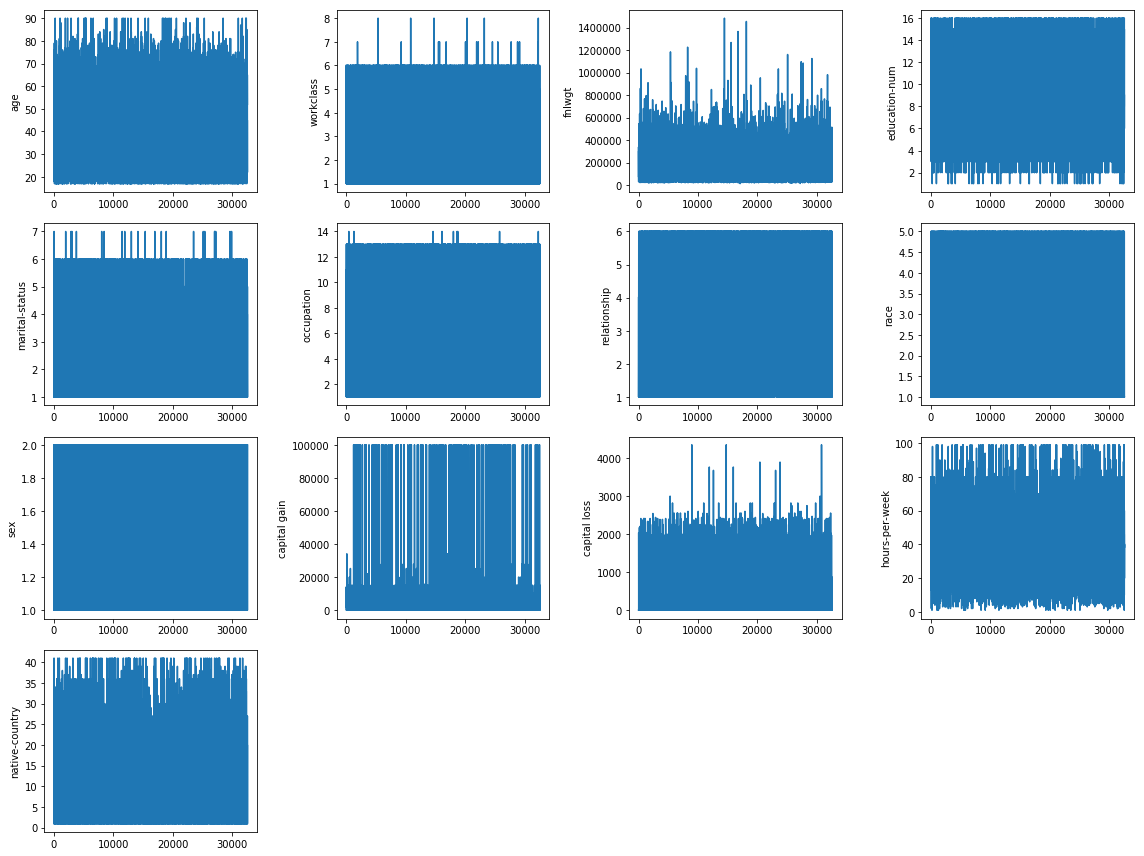

In [8]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(13):
    plt.subplot(4, 4, i+1)
    plt.plot(XC.iloc[:, i])
    plt.ylabel(XC.columns.values[i])
fig.tight_layout()

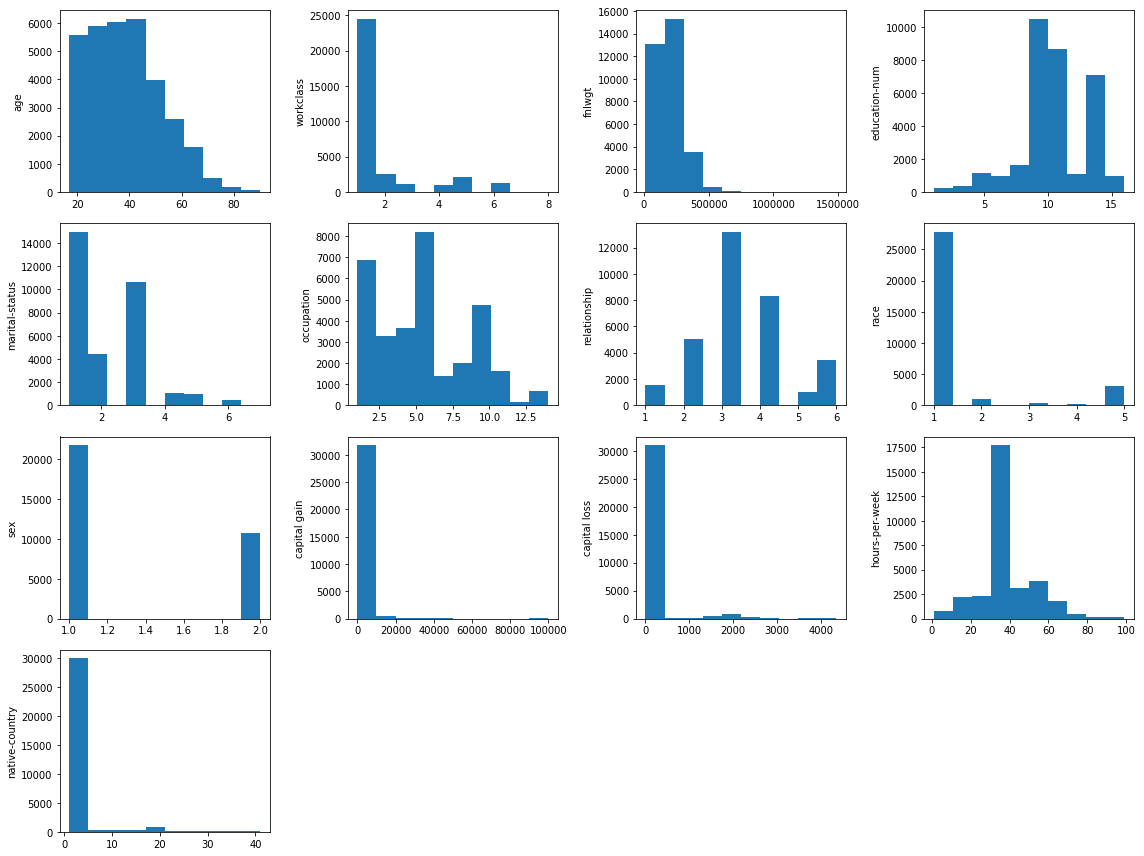

In [9]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(13):
    plt.subplot(4, 4, i+1)
    plt.hist(XC.iloc[:, i])
    plt.ylabel(XC.columns.values[i])
fig.tight_layout()

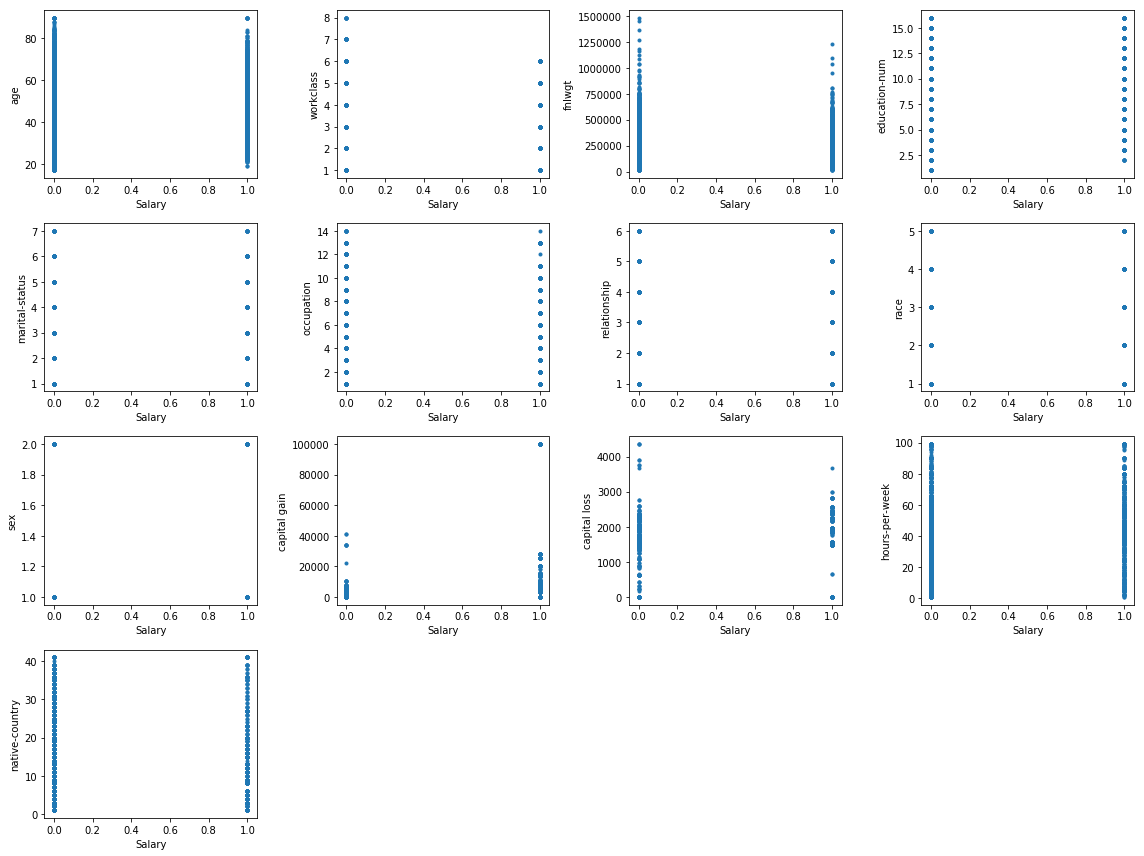

In [10]:
def box_scatterC(T,str):
    fig = plt.figure(figsize=(16,12))
    plt.clf()
    for i in range(13):
        plt.subplot(4, 4, i+1)
        plt.plot(T, XC.iloc[:, i], '.')
        plt.ylabel(XC.columns.values[i])
        plt.xlabel(str)
    fig.tight_layout()

box_scatterC(T,'Salary')

# Preliminery Observations
From the graph, we can see that less than one-third of the sample earn more than 50K in a year. Nobody who works without pay earns more than 50K/year. All the adults whom only completed preschool earn less than 50K/year. Adults who have capital gain more than aproximately 42000 get more than 50K/year. Alternatively, adults who have capital loss more than approximately 3800 earn less than 50K/year.

# III. Methods

# Summary of Neural network:
The main component of the artificial neural network is perceptron. The perceptron mimic neurons in the human body. In the neural network, we have some input signal and a weight associated with each input. In the perceptron, each input gets multiplied by the corresponding weights. During the learning phase, these weights get adjusted to predict the target value more accurately. After multiplying with the weight, all of those modified input signals are summed up. These are also a bias term added to the sum. The sum is passed through an activation function that generates the output. The bias value can also get adjusted during the training phase. This is the simplest form of neural network. But to solve the non linearly separable problem we need a complex neural network that has some hidden layer in addition to input and output layer. The process of computing the output from the input by passing signals through the hidden layer is called the forward propagation. However, if the predicted output is very acrosome and not match with the target, the weights get updated by a  method called back-propagation. In this method, we calculated the loss function in the output layer and propagated back into the network( first hidden layer, then to the input layer.). At each step to try to update the weight to minimize the gradient of the loss function. We stop training when the error is less than a predefined threshold.

# Summary of the nonlinear Logistic Regression:
Logistic regression is similar to the linear regression. It still calculates the weighted sum of the input features and the corresponding weights. But for predicting the output, it runs the weighted sum through a non-linear logistic function that converts the result to a probability between 0 to 1. This probability is interpreted as the probability that the input belongs to the positive class given the input factor. We can extend a neural network to work as a non-linear classifier by running the output from the output layer through a non-linear softmax function. This output than used to calculate the loss/error function. Instead of the squared error non-linear logistic regression uses the negative loglikelihood function as the error function. The gradient of the error function is used to update the weight of the hidden and input layer through backpropagation to get a more accurate result.

# Explanation of the codes:

In implementing non linear logistic regression, we inherit a lot of fuctions from the Nuralnet class. first, we initialize the weight to random values by calling NuralNet.\__init\__(self,nunit) function. Inside train(self, X, T) function, In the training function, I first intializes the parameters like number of iteration, lambda, optimization techniques and trace and precesion variables.  We also process the target T so that it contains only one '1' in each row by calling the prepare function. For 1000 iteration we train the nural network model on the input data. We will either run scaled conjugate gradient or steepest descent optimization. The gradientf function mainly run the forward and backword propagation function. Inside that function we first callthe forward function. In the foward function we pass the input to the the hidden layers and calcuate the weighted sum of the input features and the corresponding weight in each layer. At the output layer we pass the output through a no-linear softmax function to get classification probability. After that the gradient function calculates the error in prediction data by calling the errorf function where it takes the difference between target and prediction class. The backword function update the weights of the output layer and propagated back to the hidden layer and update weight in each step. Inside Use function we run the trained model on the test data. Using argmax funtion we define the final class from class probabilities.
- Inherit the NeuralNet class for regression, implement your own version of Nonlinear Logistic Regression classifier. 
- Explain your codes. 
- Use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from grad import scg, steepest
from copy import copy
from util import Standardizer

import nn   ## need your solution to run this
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)
        self.pp=0
    
    def softmax(self, z):
        
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def prepareT(self, T):
       
        #T=T.as_matrix()
        temp=np.zeros(T.shape[0],dtype=np.int8)
        #print("printing T", T)
        for i in range(T.shape[0]):
            if(T.item(i)>0):
                temp[i]=1
        #print(temp)
        T1 = np.zeros((T.shape[0], 2))
        T1[np.arange(T.shape[0]), temp] = 1
        return T1
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=  self.softmax(t)
               # print("in 1", t.shape)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
               # print("in 2", t.shape)
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
    
   

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
   
    #def _objectf(self, T, Y, wpenalty):
     #   return -1*np.sum(T*np.log(Y)) + wpenalty
        
    #def _errorf(self, T, Y):
       # return T - Y
    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        
        pp=0
        #print(T1)
       # nn.train(self, X, T1, **params)
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
        
        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        T=self.prepareT(T)
        #print(T.shape)
       # print("print T", T)
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            #print(error.shape)
            #print(self._W[0].shape)
            #print(self._W[1].shape)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            
            self.pp+=1
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])
        #print("count ", self.pp)
        return result

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
       
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
           
        Yl = np.argmax(Y, 1)
       
        if retZ:
            return Yl, Y, Z
        return Yl,Y


# Examination of correct implementation with preliminary test with explanation:

I have test the Nural net logistic regresssion function by training and testing it with a non-linearly seperable problem. I have two input features and two output classes. I have generated 800 random observation as shown in follows. As you can see in the picture the problem set is not linearly seperable which is perfect for testing no-linear logistic rgression classifier. First I partition my data into test and train. 60% of the data are train data and rest are test data. Within only 1000 iteration we got a accuracy 100% accuracy with scaled conjugate gradient optimization. I have also plotted the decesion boundary. As you can see from that plot that the surface (decesion boundary) pefectly seperate the two classes. From the data I got from this test I am confident that I have implemented the classifier correctly.

In [12]:
#partition of data

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.6, 0.4]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

Text(0.5,1,'Circles')

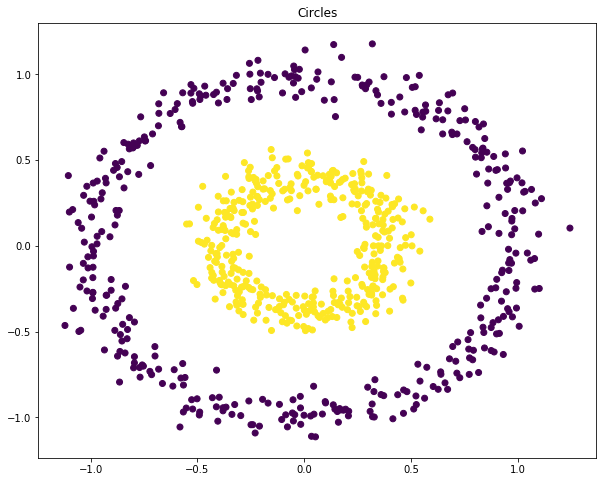

In [13]:
# Data for testing
from sklearn.datasets import make_circles

Xp, Tp = make_circles(n_samples=800, noise=0.07, factor=0.4)

plt.figure(figsize=(10, 8))
plt.scatter(Xp[:, 0], Xp[:, 1], marker='o', c=Tp)
plt.title("Circles")


In [14]:
Xpre, Tpre = partition(pd.DataFrame(Xp), pd.DataFrame(Tp))
#print(Tpre[0].as_matrix().reshape(-1))


In [15]:
Xptrain=Xpre[0].as_matrix()

Xptest=Xpre[1].as_matrix()

Tptrain=Tpre[0].as_matrix().reshape(-1)
Tptest=Tpre[1].as_matrix().reshape(-1)


In [16]:
# Apply Nonlinear Logistic Regression
from imp import reload
reload(nn)
#import warnings 
#warnings.filterwarnings('ignore')

clsf = NeuralNetLogReg([2, 4, 2])
#clsf.train(Xptrain, Tptrain)
#classes, Y = clsf.use(Xptrain)
clsf.train(Xptrain, Tptrain)
preclasses, Y = clsf.use(Xptest)

In [17]:
preclasses

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,

Accuracy:  75.9375 %
Accuracy of logistic regression algorithm for Training set:  85.0
Accuracy of logistic regression algorithm for Testing set:  75.9375
LR average_precision_score:  0.6551369863013699
LR precision_score:  0.6666666666666666
LR recall_score:  0.9452054794520548
LR f1_score:  0.781869688385269


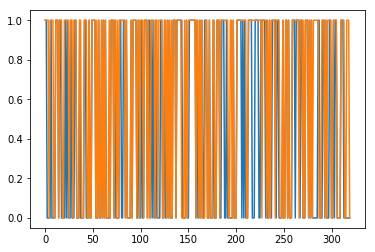

In [18]:
plt.plot(Tptest)
plt.plot(preclasses)

#Tl=Ttest.reshape(-1)
#print(Tl)
#print(classes)

#correct = [temp == TTR]
#val = (np.count_nonzero(correct)/len(TTR)) * 100
#print("Accuracy of pocket algorithm for Training set: ", val)
import sklearn.metrics
from sklearn.metrics import average_precision_score, precision_score, recall_score, f1_score

print("Accuracy: ", 100 - np.mean(np.abs(Tptest - preclasses)) * 100, "%")

preclasses, Y = clsf.use(Xptrain)
correct = [preclasses == Tptrain]
val = (np.count_nonzero(correct)/len(Tptrain)) * 100
print("Accuracy of logistic regression algorithm for Training set: ", val)

preclasses, Y = clsf.use(Xptest)
correct = [preclasses == Tptest]
val = (np.count_nonzero(correct)/len(Tptest)) * 100
print("Accuracy of logistic regression algorithm for Testing set: ", val)

#predict = lr.use(XU)
print("LR average_precision_score: ", average_precision_score(Tptest, preclasses))
print("LR precision_score: ", precision_score(Tptest, preclasses))
print("LR recall_score: ", recall_score(Tptest, preclasses))
print("LR f1_score: ",  f1_score(Tptest, preclasses))

(1000000, 2)


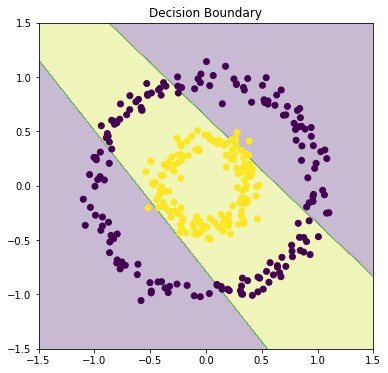

In [19]:
# show me the boundary

xpp = np.linspace(-1.5, 1.5, 1000)
ypp = np.linspace(-1.5, 1.5, 1000)

xsp, ysp = np.meshgrid(xpp, ypp)

Xtp = np.vstack((xsp.flat, ysp.flat)).T
print(Xtp.shape)
preclasses, _ = clsf.use(Xtp)
zsp = preclasses.reshape(xsp.shape)

plt.figure(figsize=(6,6))
plt.contourf(xsp, ysp, zsp.reshape(xsp.shape), alpha=0.3)
plt.title("Decision Boundary")

plt.scatter(Xptest[:, 0], Xptest[:, 1], marker='o', c=Tptest+3)

# Cross validation codes and explanation:

Cross-validation is a process to test how well the classifier will work on the other independent dataset that was not used for training the classifier. Using cross-validation, we can check our model for overfitting in the training phase to get an idea of how well the machine learning model will work in practice. Based on the folds of the cross-validation model we split the data into training and testing set. Like for a three-fold cross-validation, we will split the data into 3 parts. Then we will hold one as the validation/test set and other two as the training set. So we will train our model with each of the training fold and then test the accuracy by comparing the result with the testing fold. This is a repeated process, so each step we will hold one as validation dataset and the other two as training dataset. In general, the result from all the round are averaged to predict the accuracy of the dataset.

I developed the following cross-validation function to validate the nonlinear logistic regression classifier. It takes the training and test data and number of folds as input. The cross_validation_split function split the data into the number of folds. Inside the cross-validation function, param defines different values of lambda, iteration and optimization methods.  We selected one fold as validation fold and then train the model with the remaining fold and tested with the validation fold for all the values of parameters. We store combination of parameter value for which we got the lowest root mean square error. In the end, the function returns the combination of parameters value that results in the highest accuracy for each training/testing round. I ran a 5 fold cross validation on my priliminery test data. we can see the highest accuracy occurs for iteration 500, optimization technique SCG and lambda 0.


 

# Cross validation for Nural Net logistic regression 

In [20]:
# TODO: try to implement your own K-fold CV.  

import itertools as it
def cross_validation_split(X,T, K):
    fold_size = int(len(X) / K)
    r=0;
    foldX = []
    foldT = []
    while len(foldX) < K:
        foldX.append(X.iloc[r:r+fold_size, :])
        foldT.append(T.iloc[r:r+fold_size, :])
        r+=fold_size
    return foldX, foldT


 # add a basis
def add_ones(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))
    


def cross_validation(X,T):
    Xfold, Tfold = cross_validation_split(pd.DataFrame(X), pd.DataFrame(T),5)
    #Xfold=np.asarray(Xfold)
    
    testAcc = []
   
    res = []
    
    trace=[]
    param= [0, 0.1, 0.5, 1, 10]
    optim = ['scg', 'steepest']
    niter = [500, 1000, 1500]
    model = NeuralNetLogReg([X.shape[1], 4, 2])
    trfold=0
    for validation in range(len(Xfold)):
        maxacc=0;
        best_param={}
        Xval=add_ones(Xfold[validation]);
        for train in range(len(Xfold)):
            if train!=validation:        
                #finalX=add_ones(Xfold[train]);
                for p in range(len(param)):
                     for opt in range(len(optim)):
                        for it in range(len(niter)):
                            parameters = {'niter': niter[it], 'optim': optim[opt], 'Lambda':param[p] }
                            model.train(Xfold[train].as_matrix(),Tfold[train].as_matrix().reshape(-1), **parameters)
                            TP,y=model.use(Xfold[validation].as_matrix())
                   # w=ridge(finalX, Tfold[train],param[p])
                   # TP=Xval@w
                            acc=100 - np.mean(np.abs(Tfold[validation].as_matrix().reshape(-1) - TP)) * 100
                    
                    #er=rmse(np.asarray(Tfold[validation]), TP);
                            if(acc>maxacc):
                                maxacc=acc
                                best_param=parameters
                                print(best_param)
                                trfold=train
        #print(validation, miner,best_param)
        #retrainX=add_ones(Xfold[validation]);
        #wr=ridge(retrainX, Tfold[validation],best_param)
        model.train(Xfold[trfold].as_matrix(),Tfold[trfold].as_matrix().reshape(-1),**best_param)
        TP,y=model.use(Xfold[validation].as_matrix())
        acc=100 - np.mean(np.abs(Tfold[validation].as_matrix().reshape(-1) - TP)) * 100
        #print(testerr)
        testAcc.append((best_param,acc))
        
    return testAcc
            
        


In [21]:
print(Xptrain.shape[1])
result=cross_validation(Xptrain, Tptrain)
print(result)

2
{'Lambda': 0, 'optim': 'scg', 'niter': 500}


C:\Users\mtabassu\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
C:\Users\mtabassu\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


{'Lambda': 0, 'optim': 'scg', 'niter': 500}
{'Lambda': 0, 'optim': 'scg', 'niter': 500}
{'Lambda': 0, 'optim': 'scg', 'niter': 500}
{'Lambda': 0, 'optim': 'steepest', 'niter': 500}
{'Lambda': 0, 'optim': 'steepest', 'niter': 1000}
{'Lambda': 0, 'optim': 'scg', 'niter': 500}
{'Lambda': 0, 'optim': 'scg', 'niter': 1000}
{'Lambda': 0, 'optim': 'steepest', 'niter': 1500}
{'Lambda': 0, 'optim': 'scg', 'niter': 1500}
{'Lambda': 0, 'optim': 'scg', 'niter': 1000}
{'Lambda': 0, 'optim': 'scg', 'niter': 500}
{'Lambda': 0, 'optim': 'scg', 'niter': 500}
{'Lambda': 0, 'optim': 'scg', 'niter': 1500}
{'Lambda': 0, 'optim': 'scg', 'niter': 500}
{'Lambda': 0, 'optim': 'scg', 'niter': 1000}
{'Lambda': 0, 'optim': 'steepest', 'niter': 1500}
[({'Lambda': 0, 'optim': 'scg', 'niter': 500}, 98.95833333333333), ({'Lambda': 0, 'optim': 'steepest', 'niter': 1000}, 94.79166666666667), ({'Lambda': 0, 'optim': 'scg', 'niter': 1000}, 94.79166666666667), ({'Lambda': 0, 'optim': 'scg', 'niter': 1500}, 94.791666666666

# Run NeuralNetLogReg on my data

In [24]:
Xlst, Tlst = partition(pd.DataFrame(XC), pd.DataFrame(T))

In [25]:
# Apply Nonlinear Logistic Regression
from imp import reload
reload(nn)
#import warnings 
#warnings.filterwarnings('ignore')

inp=Xlst[0].shape[1]
TT=Tlst[0].as_matrix()
clsf = NeuralNetLogReg([inp, 4, 2])
param = {'niter': 500, 'Lambda':0 }
clsf.train(Xlst[0].as_matrix(), Tlst[0].as_matrix().reshape(-1),**param,ftracep=True)
classes, Y, Z= clsf.use(Xlst[1].as_matrix(), retZ=True)

C:\Users\mtabassu\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
C:\Users\mtabassu\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
classes

In [26]:
Tl=Tlst[1].as_matrix().reshape(-1)
print("Accuracy: ", 100 - np.mean(np.abs(Tl - classes)) * 100, "%")

preclasses, Y = clsf.use(Xlst[0].as_matrix())
correct = [preclasses == Tlst[0].as_matrix().reshape(-1)]
val = (np.count_nonzero(correct)/len(Tlst[0].as_matrix().reshape(-1))) * 100
print("Accuracy of logistic regression algorithm for Training set: ", val)

preclasses, Y = clsf.use(Xlst[1].as_matrix())
correct = [preclasses == Tl]
val = (np.count_nonzero(correct)/len(Tl)) * 100
print("Accuracy of logistic regression algorithm for Testing set: ", val)

#predict = lr.use(XU)
print("LR average_precision_score: ", average_precision_score(Tl, preclasses))
print("LR precision_score: ", precision_score(Tl, preclasses))
print("LR recall_score: ", recall_score(Tl, preclasses))
print("LR f1_score: ",  f1_score(Tl, preclasses))

Accuracy:  84.8203316953317 %
Accuracy of logistic regression algorithm for Training set:  84.7161795567385
Accuracy of logistic regression algorithm for Testing set:  84.8203316953317
LR average_precision_score:  0.5320826926445613
LR precision_score:  0.744006501422186
LR recall_score:  0.5761485210824417
LR f1_score:  0.6494059230359993


Text(0.5,1,'salary data')

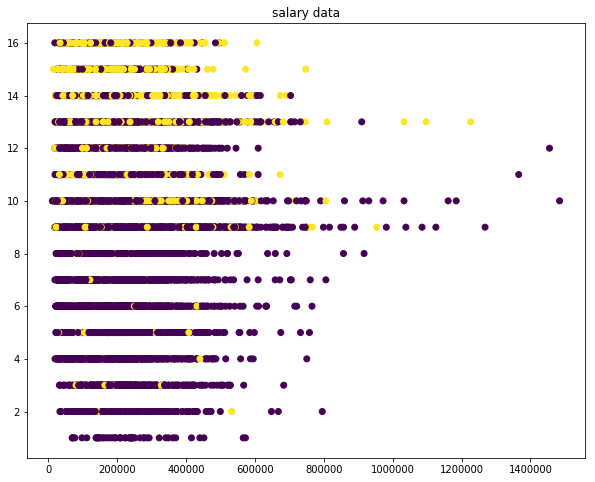

In [27]:
plt.figure(figsize=(10, 8))
fullX=XC.as_matrix()

plt.scatter(fullX[:, 2], fullX[:, 3], marker='o', c=T.as_matrix())
plt.title("salary data")


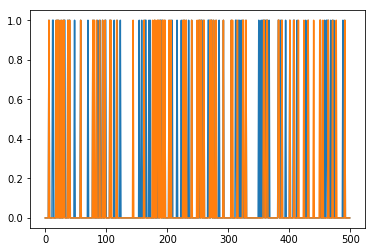

In [28]:

plt.plot(Tl[:500])
plt.plot(classes[:500])

C:\Users\mtabassu\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Hidden layer unit values ($z$)')

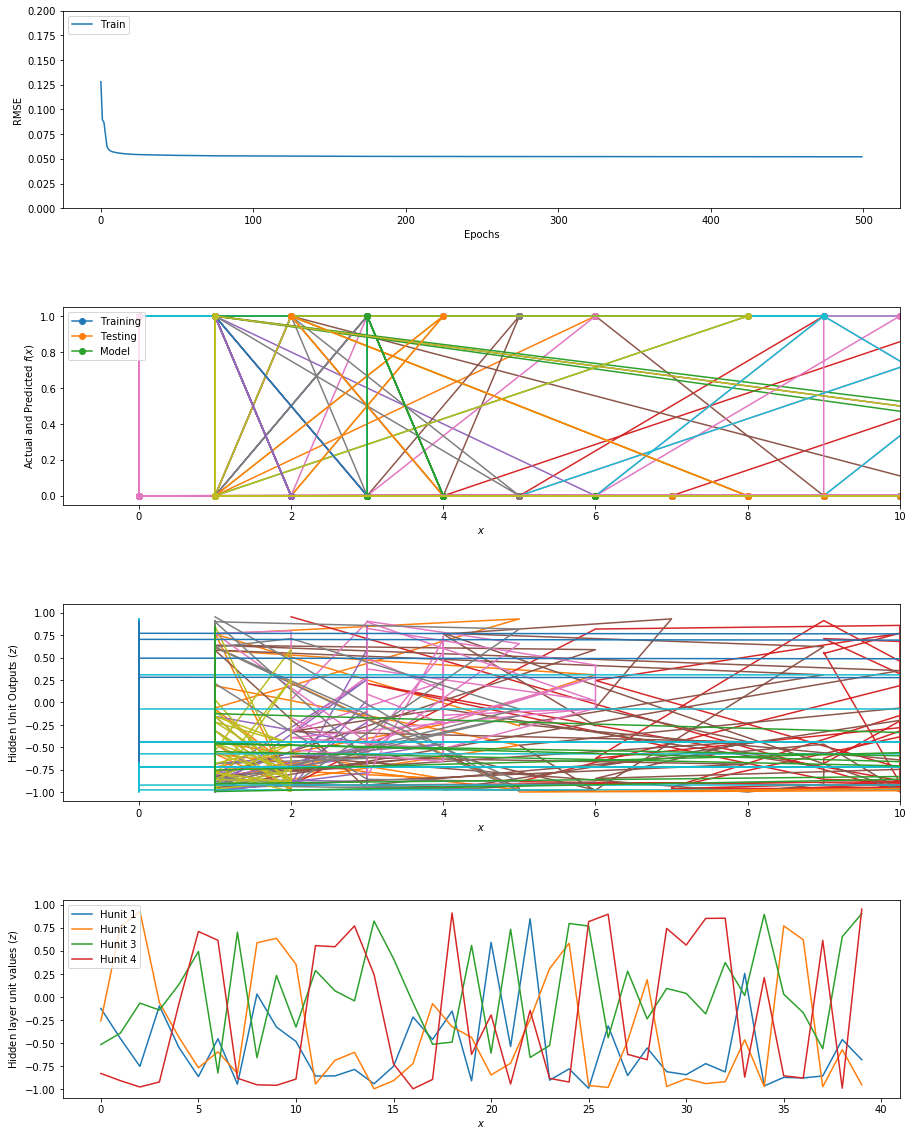

In [29]:

#ntrace=[x / 20000 for x in clsf.ftrace]
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=.5)
plt.subplot(4,1,1)
plt.plot(clsf.ftrace)
plt.ylim(0,0.2)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(4,1,2)
plt.plot(Xlst[0].as_matrix()[:20],Tlst[0].as_matrix().reshape(-1)[:20],'o-',Xlst[1].as_matrix()[:20],Tl[:20],'o-',Xlst[1].as_matrix()[:20],classes[:20],'o-')
plt.xlim(-1,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(4,1,3)
plt.plot(Xlst[1].as_matrix()[:40], Z[1][:40])
plt.xlim(-1,10)
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

plt.subplot(4,1,4)
plt.plot(Z[1][:40, 0], label='hidden 1')
plt.plot(Z[1][:40, 1], label='hidden 2')
plt.plot(Z[1][:40, 2], label='hudden 3')
plt.plot(Z[1][:40, 3], label='hidden 4')
plt.legend(('Hunit 1','Hunit 2','Hunit 3', 'Hunit 4'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Hidden layer unit values ($z$)')

#  Run Pocket algorithm on my data

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import abc
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X -  self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

In [54]:
errTrace= []
from copy import deepcopy as copy 

class pocketalgorithm(Classifier):
    
    def __init__(self, alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
        self.niter=500
    
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        X = self.normalize(X)
        
        w = np.zeros(X.shape[1])
        self.w_pocket = copy(w)
        #errTrace= []
        for i in range(self.niter):
            converged = True
            err=0
            for k in range(X.shape[0]):
                
                y=X[k] @ w;
                if(np.sign(y) != np.sign(T[k])):
                    err+=1
                    w += (self.alpha * T[k] * X[k])
                    converged = False
                    
            mean_err=err/X.shape[0]
            print(mean_err)
            errTrace.append(mean_err)
            if self.compare(X, T, w, self.w_pocket)>0:
                self.w_pocket = copy(w)
         
            if converged:
                print("converged at ", i)
                break
    
    
    def use(self, X):
        X = self.normalize(X)
        return (np.sign(X@self.w_pocket))
    

In [50]:

def convert(pttrain):
    for i in range(len(pttrain)):
        if pttrain[i]==0:
            pttrain[i]=-1
    return pttrain

pttrain=convert(Tlst[0].as_matrix().reshape(-1))

print(pttrain.reshape(-1,1))

[[-1]
 [-1]
 [-1]
 ...
 [-1]
 [-1]
 [-1]]


In [55]:
pkt = pocketalgorithm(0.1)

pkt.train(Xlst[0].as_matrix(),pttrain.reshape(-1,1))

0.2822848953268158
0.2762962583815325
0.2742488611352818
0.2750166351026258
0.2765521830373138
0.27486308030915696
0.27506782003378205
0.2744024159287506
0.2736346419614066
0.2738905666171879
0.27445360085990683
0.27394175154834416
0.2755796693453447
0.2743512309975943
0.2753237446895634
0.27527255975840714
0.27276449813175
0.2754772994830322
0.2751190049649383
0.27680810769309516
0.2736858268925628
0.2740441214106567
0.2751190049649383
0.2743512309975943
0.27711521728003274
0.27491426524031326
0.27399293647950046
0.27225264882018735
0.2751190049649383
0.2736858268925628
0.27317397758100015
0.2755796693453447
0.2743512309975943
0.2762450734503762
0.2776270665915954
0.27568203920765727
0.2727133132005937
0.27414649127296925
0.27133132005937455
0.27220146388903105
0.2754772994830322
0.2751701898960946
0.27296923785637506
0.2743512309975943
0.27332753237446894
0.2738393816860316
0.27409530634181295
0.2746071556533756
0.2770128474177202
0.27788299124737675
0.2779853611096893
0.271228950197

0.2737370118237191
0.2768592926242514
0.27916261452628344
0.2772175871423453
0.27731995700465784
0.27527255975840714
0.27220146388903105
0.27430004606643804
0.27604033372575115
0.2744024159287506
0.27302042278753136
0.27491426524031326
0.27506782003378205
0.2761427035880637
0.2734810871679378
0.27470952551568817
0.2778318063162205
0.2770128474177202
0.2746071556533756
0.2745559707222194
0.27808773097200185
0.2745559707222194
0.2741976762041255
0.2743512309975943
0.27486308030915696
0.2737370118237191
0.27506782003378205
0.2753237446895634
0.27394175154834416
0.2736858268925628
0.27522137482725084
0.27450478579106313
0.27660336796847007
0.2741976762041255
0.27486308030915696
0.27660336796847007
0.2767057378307826
0.2755796693453447
0.27583559400112606
0.27353227209909403
0.2776270665915954
0.2776782515227517
0.27399293647950046
0.27163842964631213
0.2743512309975943
0.2774735117981266
0.2762962583815325
0.27522137482725084
0.2755284844141885
0.27542611455187593
0.27665455289962637
0.276

In [52]:
def convzto1(pT): 
    #print(pT)
    for i in range(len(pT)):
        if pT[i]==-1:
            pT[i]=0
  
    return pT



Text(0,0.5,'Error')

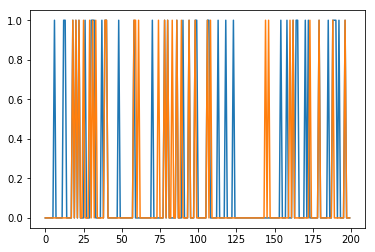

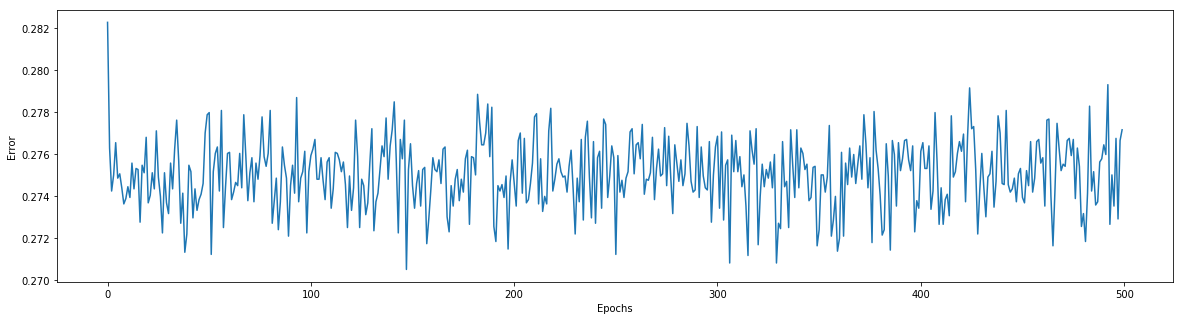

In [56]:
pT=convzto1(pkt.use(Xlst[1].as_matrix()))

plt.plot(Tlst[1].as_matrix()[:200])
plt.plot(pT[:200])


plt.figure(figsize=(20,5))
           
plt.plot(errTrace)
plt.xlabel('Epochs')
plt.ylabel('Error')

In [57]:
Tl=Tlst[1].as_matrix().reshape(-1)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - pT.reshape(-1))) * 100, "%")

pTT=convzto1(pkt.use(Xlst[0].as_matrix()));
correct = [pTT== Tlst[0].as_matrix().reshape(-1)]
val = (np.count_nonzero(correct)/len(Tlst[0].as_matrix().reshape(-1))) * 100
print("Accuracy of pocket algorithm for Training set: ", val)

pTT=convzto1(pkt.use(Xlst[1].as_matrix()));
correct = [pTT == Tl]
val = (np.count_nonzero(correct)/len(Tl)) * 100
print("Accuracy of pocket algorithm for Testing set: ", val)

#predict = lr.use(XU)
print("pocket average_precision_score: ", average_precision_score(Tl, pTT))
print("pocket precision_score: ", precision_score(Tl, pTT))
print("pocket recall_score: ", recall_score(Tl, pTT))
print("pocket f1_score: ",  f1_score(Tl, pTT))

Accuracy:  77.42628992628993 %
Accuracy of pocket algorithm for Training set:  10.63111020115678
Accuracy of pocket algorithm for Testing set:  77.42628992628993
pocket average_precision_score:  0.378352130664906
pocket precision_score:  0.5459459459459459
pocket recall_score:  0.44493392070484583
pocket f1_score:  0.49029126213592233


In [ ]:
def cross_validation_pkt(X,T):
    Xfold, Tfold = cross_validation_split(pd.DataFrame(X), pd.DataFrame(T),5)
    #Xfold=np.asarray(Xfold)
    
    testAcc = []
   
    res = []
    
    trace=[]
    param= [0, 0.1, 0.5]
    niter = [500, 1000, 1500]
    model = NeuralNetLogReg([X.shape[1], 4, 2])
    trfold=0
    for validation in range(len(Xfold)):
        maxacc=0;
        best_param=0;
        Xval=add_ones(Xfold[validation]);
        for train in range(len(Xfold)):
            if train!=validation:        
                #finalX=add_ones(Xfold[train]);
                for p in range(len(param)):
                       # for it in range(len(niter)):
                        model=pocketalgorithm(param[p])
                        model.train(Xfold[train].as_matrix(),convert(Tfold[train].as_matrix().reshape(-1)))
                        TP=model.use(Xfold[validation].as_matrix())
                   # w=ridge(finalX, Tfold[train],param[p])
                   # TP=Xval@w
                        acc=100 - np.mean(np.abs(Tfold[validation].as_matrix().reshape(-1) - convzto1(TP))) * 100
                    
                    #er=rmse(np.asarray(Tfold[validation]), TP);
                        if(acc>maxacc):
                            maxacc=acc
                            best_param=param[p]
                            print(best_param)
                            trfold=train
        #print(validation, miner,best_param)
        #retrainX=add_ones(Xfold[validation]);
        #wr=ridge(retrainX, Tfold[validation],best_param)
        model=pocketalgorithm(best_param)
        model.train(Xfold[trfold].as_matrix(),Tfold[trfold].as_matrix().reshape(-1))
        TP=model.use(Xfold[validation].as_matrix())
        acc=100 - np.mean(np.abs(Tfold[validation].as_matrix().reshape(-1) - convzto1(TP))) * 100
        #print(testerr)
        testAcc.append((best_param,acc))
        
    return testAcc
            

In [ ]:
result=cross_validation_pkt(Xlst[0].as_matrix(), Tlst[0].as_matrix().reshape(-1))

In [ ]:
result

# IV - Results

- Pick one of classifieres in Assignment #2 and compare with Nonlinear Logistic Regression.
- Presents the results of applications of thw two classifiers.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results?

# Discussions about parameter/network structure choice:
My network architecture is 13 by 4 by 2 because I have 13 input feature, 4 hidden layer and 2 output class. For non-liner logistic regression I choose to use lambda=0, iteration=500, optimization methos=scaled conjugate gradient and number hidden layer=4. The reason behind that is I validate my model with 5 fold cross validation and the result showed that this combination of parameter gives the best result. So, I hope this combination of parameter will generate more accurate result on any independent data set rather than only the training data. I have also run the cross validation on pocket algorithm and found that alpha=0.1 gives the best accuracy. That's why I choose that alpha as 0.1

# Discussions about classificaion model comparison
I have decided to compare the non linear logistic regression with pocket algorithm model. We can see that non-linear logistic function perform well(7% more accurate) than pocket algorithm. The problem data set has 13 features and is a non-linearly separable problem. I think that is the main reason for non-linear logistic regression to perorm well because it handles non linear problem set more efficiently by using multiple hidden layers. Also, in my example the pocket algorithm needed more iteration to converge than the nural net logistic regression classifier. So, sometimes the nuralnet logistic regression is faster than the pocket algorithm. also we can see from the result that non-linear logistic regression has better precesion, recall and f1 score than pocket algorithm. So, non-linear logistic regression has results low false positive and false negative than pocket algorithm.


# Discussion about the classification results.
I think the nural net logistic regression is more powerful and accurate than pocket algorithm mainly because it has multipe hidden layer. This gives it more flexibility to solve non-linearly separable problems. The nural net logistic regression model iteratively learn how to best update weight through the back propagattion at each layer of the network to reduce error. Form the classification result we can see that non-linear logistic regression give more accurate result than the pocket algorithm. Also, it has better f1 score hence have lower number of false positive and false negative. 
From the visualization diagrams of non-linear logistic regression we can see that the error is decreasing and getting closer to 0 with each iteration. We can also see the weight of the hidden layers update in each iteration to better match the traget values.

# Conclusions
I think I understand the concept neural network and how it works more clearly after doing this assignment. The challenge was run the cross validation on big data set. It tool a lot of time. I think it would be helpful if the rubric can be alittle bit more straightforward.

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Try nonlinear regression with neural networks and compare with linear regression model 
- Use cross validation to discover the best model and compare models. 

# TO START

- download [a4.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a4.tgz). 
- import the necessary classes or functions including NeuralNet.
- inherit NeuralNet and make NeuralNetLogReg

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 | 5| Summary of Neural Networks
 | 5| Summary of Nonlinear Logistic Regression
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 20| plots for results (10 pts for each classifier)
| 5| Discussions about parameter/network structure choice 
| 5| Discussions about classificaion model comparison
| 5| Discussion about the classification results. Try to analyze what nonlinear logistic regression learned. 
5 | Conclusions 
